# Processing Crime Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os

In [6]:
#load data
pitt = pd.read_csv('Resources/crime_data/pitt_crime.csv')
detroit = pd.read_csv('Resources/crime_data/detroit_crime_data.csv')
ct = pd.read_csv('Resources/crime_data/CT_all_crimes_by_town.csv')

#load philly data
crime_files = os.listdir('Resources/crime_data/philly_crime_data')
base_dir = 'Resources/crime_data/philly_crime_data/'
df_list = []

for file_path in crime_files:
    path = base_dir + file_path
    tmp = pd.read_csv(path)
    df_list.append(tmp)

philly_crime_df = pd.concat(df_list)

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_59851/1820818359.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  detroit = pd.read_csv('Resources/crime_data/detroit_crime_data.csv')


### Processing Pittsburgh Data

In [7]:
pitt.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [9]:
#select specific columns
selected_columns = pitt[['ARRESTTIME', 'OFFENSES', 'INCIDENTTRACT']]

#extract year from timestamp
selected_columns['YEAR'] = selected_columns['ARRESTTIME'].apply(lambda x: x[:4])

#drop timestamp
selected_columns.drop('ARRESTTIME', axis=1, inplace=True)
selected_columns.head()

#extract offenses as list
def extract_offenses(val):
    val = str(val)
    return val.split('/')

selected_columns['OFFENSELIST'] = selected_columns['OFFENSES'].apply(extract_offenses)
selected_columns.drop('OFFENSES', axis=1, inplace=True)

#1 row = 1 offense
selected_columns = selected_columns.explode('OFFENSELIST')

# Reset index
selected_columns = selected_columns.reset_index(drop=True)

#rename col
selected_columns = selected_columns.rename({'OFFENSELIST': 'OFFENSE'}, axis=1) 

selected_columns.head()

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_59851/3318261276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['YEAR'] = selected_columns['ARRESTTIME'].apply(lambda x: x[:4])
/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_59851/3318261276.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns.drop('ARRESTTIME', axis=1, inplace=True)
/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_59851/3318261276.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,INCIDENTTRACT,YEAR,OFFENSE
0,804.0,2016,3929 Retail Theft.
1,5599.0,2016,13(a)(16) Possession of Controlled Substance
2,2811.0,2016,3929 Retail Theft.
3,2304.0,2016,5503 Disorderly Conduct.
4,2304.0,2016,5505 Public Drunkenness


In [12]:
pitt_tracts = pd.read_csv('Resources/tract_maps/PittsburghCensusTracts.csv')
pitt_tracts.head()

,OBJECTID,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,Shape__Area,Shape__Length
0,1,42,3,50100,42003050100,501.0,Census Tract 501,G5020,S,790373,0,40.447713,-79.972891,8.506823e+06,14507.763769
1,2,42,3,70600,42003070600,706.0,Census Tract 706,G5020,S,289738,0,40.453270,-79.925478,3.118432e+06,8884.418096
2,3,42,3,80700,42003080700,807.0,Census Tract 807,G5020,S,275058,0,40.460973,-79.934380,2.960447e+06,7707.084592
3,4,42,3,90100,42003090100,901.0,Census Tract 901,G5020,S,672423,146361,40.475287,-79.961682,8.812577e+06,12376.528377
4,5,42,3,111500,42003111500,1115.0,Census Tract 1115,G5020,S,965267,0,40.462207,-79.924639,1.038912e+07,15320.030007


In [13]:
merged = selected_columns.merge(pitt_tracts, left_on='INCIDENTTRACT', right_on='name', how='left')
merged.head()

,INCIDENTTRACT,YEAR,OFFENSE,OFFENSECODE,OFFENSETYPE,OBJECTID,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,Shape__Area,Shape__Length
0,804.0,2016,3929 Retail Theft.,3929.0,Property,8.0,42.0,3.0,80400.0,4.200308e+10,804.0,Census Tract 804,G5020,S,430386.0,0.0,40.456336,-79.945907,4.632241e+06,11705.154905
1,5599.0,2016,13(a)(16) Possession of Controlled Substance,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2811.0,2016,3929 Retail Theft.,3929.0,Property,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2304.0,2016,5503 Disorderly Conduct.,5503.0,Nuisance/Public Order,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2304.0,2016,5505 Public Drunkenness,5505.0,Nuisance/Public Order,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
merged = merged[['INCIDENTTRACT', 'YEAR', 'OFFENSE', 'geoid']]
merged = merged.dropna()

In [19]:
#get codes from offense descriptions
def get_code(val):
    for word in val.split():
        if word.isdigit():
            return int(word)
    return np.nan

selected_columns['OFFENSECODE'] = selected_columns['OFFENSE'].apply(get_code)

# Function to categorize offenses
def categorize_offense(code):
    if np.isnan(code):
        return "Other"
    else:
        leading_digits = int(code/100)

    if leading_digits in [25, 26, 27, 28, 29, 30]:
        return "Violent"
    elif leading_digits in [33, 35, 37, 39 ]:
        return "Property"
    elif leading_digits in [55, 57, 59]:
        return "Nuisance/Public Order"
    else:
        return "Other"

# Apply function to create a new column
selected_columns['OFFENSETYPE'] = selected_columns['OFFENSECODE'].apply(categorize_offense)

selected_columns

,INCIDENTTRACT,YEAR,OFFENSE,OFFENSECODE,OFFENSETYPE
0,804.0,2016,3929 Retail Theft.,3929.0,Property
1,5599.0,2016,13(a)(16) Possession of Controlled Substance,NaN,Other
2,2811.0,2016,3929 Retail Theft.,3929.0,Property
3,2304.0,2016,5503 Disorderly Conduct.,5503.0,Nuisance/Public Order
4,2304.0,2016,5505 Public Drunkenness,5505.0,Nuisance/Public Order
...,...,...,...,...,...
173118,2406.0,2014,2701 Simple Assault.,2701.0,Violent
173119,2406.0,2014,3304 Criminal Mischief.,3304.0,Property
173120,2406.0,2014,3745 Accidents Involving Damage to Unattended...,3745.0,Property
173121,2406.0,2014,2701 Simple Assault.,2701.0,Violent


In [21]:
grouped = selected_columns.groupby(['YEAR','INCIDENTTRACT', 'OFFENSETYPE']).count()
grouped = grouped.reset_index()
grouped = grouped.rename({"OFFENSE": 'TOTAL', "OFFENSECODE": "UNIQUE"}, axis=1)
grouped.head()

,YEAR,INCIDENTTRACT,OFFENSETYPE,TOTAL,UNIQUE
0,1998,201.0,Other,4,3
1,2007,1303.0,Other,4,0
2,2007,2620.0,Violent,1,1
3,2007,2811.0,Other,1,1
4,2007,2811.0,Property,1,1


In [23]:
# Pivot the DataFrame to create separate columns for each offense type
df_pivot = grouped.pivot_table(index=['YEAR', 'INCIDENTTRACT'], 
                           columns='OFFENSETYPE', 
                           values='TOTAL',
                           aggfunc='sum', 
                           fill_value=0).reset_index()

# Rename offense columns for clarity
df_pivot = df_pivot.rename(columns={'Property': 'property_crime', 
                                    'Violent': 'violent_crime', 
                                    "Nuisance/Public Order": 'nuisance_crime',
                                    'Other': 'other_crime'})

# Add a total offenses column
df_pivot['total_offenses'] = df_pivot[['property_crime', 'violent_crime', 'other_crime', 'nuisance_crime']].sum(axis=1)

# df_pivot = df_pivot.drop('OFFENSETYPE', axis=1)

df_pivot.head()

OFFENSETYPE,YEAR,INCIDENTTRACT,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses
0,1998,201.0,0,4,0,0,4
1,2007,1303.0,0,4,0,0,4
2,2007,2620.0,0,0,0,1,1
3,2007,2811.0,0,1,1,0,2
4,2008,1516.0,0,0,0,1,1


In [63]:
df_pivot['YEAR'].unique()

array(['1998', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'], dtype=object)

In [66]:
#highest crime by tract for 2023
df_pivot[df_pivot['YEAR'] == '2023'].sort_values(by='total_offenses', ascending=False)

OFFENSETYPE,YEAR,INCIDENTTRACT,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses
1057,2023,201.0,96,1445,170,203,1818
1161,2023,2304.0,32,591,85,40,716
1131,2023,1702.0,93,441,141,76,658
1108,2023,1306.0,10,330,97,93,520
1097,2023,1115.0,6,248,104,35,387
...,...,...,...,...,...,...,...
1195,2023,6699.0,0,4,5,1,10
1117,2023,1411.0,0,8,0,1,9
1110,2023,1402.0,0,3,0,2,5
1147,2023,2016.0,0,2,2,0,4


In [67]:
grouped_by_year = df_pivot.groupby('YEAR').sum()['total_offenses']

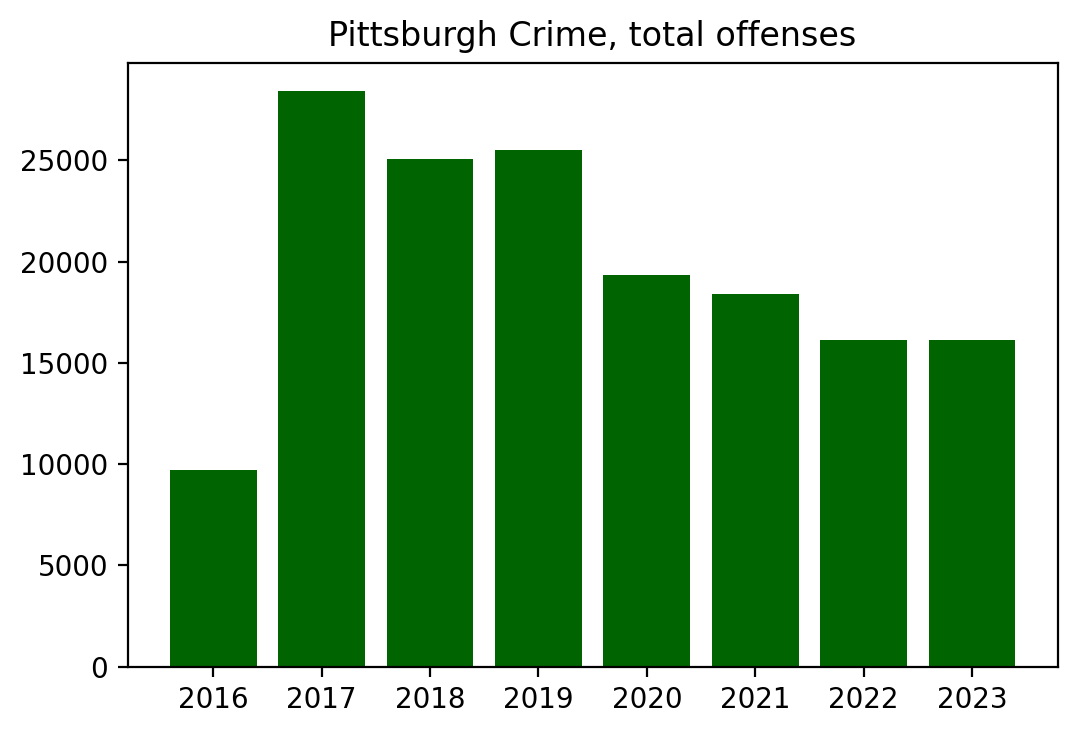

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4), dpi=200)
plt.bar(np.arange(2016, 2024, 1), grouped_by_year[10:], color='darkgreen')
plt.title('Pittsburgh Crime, total offenses')
plt.show()

In [24]:
merged = df_pivot.merge(pitt_tracts, left_on='INCIDENTTRACT', right_on='name', how='left')
merged.head()

,YEAR,INCIDENTTRACT,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses,OBJECTID,statefp,countyfp,...,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,Shape__Area,Shape__Length
0,1998,201.0,0,4,0,0,4,38.0,42.0,3.0,...,201.0,Census Tract 201,G5020,S,1427891.0,465722.0,40.440662,-80.001277,2.038098e+07,20399.907355
1,2007,1303.0,0,4,0,0,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,2620.0,0,0,0,1,1,90.0,42.0,3.0,...,2620.0,Census Tract 2620,G5020,S,1647931.0,0.0,40.467171,-79.995213,1.773669e+07,19162.345246
3,2007,2811.0,0,1,1,0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1516.0,0,0,0,1,1,45.0,42.0,3.0,...,1516.0,Census Tract 1516,G5020,S,819407.0,0.0,40.425002,-79.944401,8.819297e+06,14224.984097


In [25]:
merged.columns

Index(['YEAR', 'INCIDENTTRACT', 'nuisance_crime', 'other_crime',
       'property_crime', 'violent_crime', 'total_offenses', 'OBJECTID',
       'statefp', 'countyfp', 'tractce', 'geoid', 'name', 'namelsad', 'mtfcc',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'Shape__Area',
       'Shape__Length'],
      dtype='object')

In [26]:
merged = merged.dropna()
merged = merged[['YEAR', 'INCIDENTTRACT', 'nuisance_crime', 'other_crime',
       'property_crime', 'violent_crime', 'total_offenses', 'geoid', 'name']]
merged.head()

,YEAR,INCIDENTTRACT,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses,geoid,name
0,1998,201.0,0,4,0,0,4,4.200302e+10,201.0
2,2007,2620.0,0,0,0,1,1,4.200326e+10,2620.0
4,2008,1516.0,0,0,0,1,1,4.200315e+10,1516.0
5,2009,305.0,0,2,1,0,3,4.200303e+10,305.0
8,2011,1113.0,0,1,0,0,1,4.200311e+10,1113.0


In [27]:
merged.rename({'name': 'tract'}, axis=1, inplace=True)
merged.head()

,YEAR,INCIDENTTRACT,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses,geoid,tract
0,1998,201.0,0,4,0,0,4,4.200302e+10,201.0
2,2007,2620.0,0,0,0,1,1,4.200326e+10,2620.0
4,2008,1516.0,0,0,0,1,1,4.200315e+10,1516.0
5,2009,305.0,0,2,1,0,3,4.200303e+10,305.0
8,2011,1113.0,0,1,0,0,1,4.200311e+10,1113.0


In [28]:
#save data
merged.to_csv('Resources/crime_data/new_processed_pitt_crime.csv')

### Processing Philly data

In [78]:
philly_crime_df.head()

,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,0101000020E610000033F71429E2D052C0884A02580D07...,153112.0,0101000020110F0000861BAE13F6F55FC18F4487EEB797...,155230,25,4,2021-02-18 23:22:00+00,2021-02-18,18:22:00,18.0,2.021250e+11,N FAIRHILL ST / W SOMERSET ST,400,Aggravated Assault Firearm,-75.263804,40.055095,40.055095,-75.263804
1,0101000020E610000033F71429E2D052C0884A02580D07...,153114.0,0101000020110F0000861BAE13F6F55FC18F4487EEB797...,155232,8,2,2021-02-03 22:42:00+00,2021-02-03,17:42:00,17.0,2.021080e+11,10800 BLOCK KNIGHTS R,600,Theft from Vehicle,-75.263804,40.055095,40.055095,-75.263804
2,0101000020E610000033F71429E2D052C0884A02580D07...,153115.0,0101000020110F0000861BAE13F6F55FC18F4487EEB797...,155233,3,1,2021-01-28 17:56:00+00,2021-01-28,12:56:00,12.0,2.021030e+11,1000 BLOCK WASHINGTON AV GTON AV,600,Thefts,-75.263804,40.055095,40.055095,-75.263804
3,0101000020E610000033F71429E2D052C0884A02580D07...,153116.0,0101000020110F0000861BAE13F6F55FC18F4487EEB797...,155234,15,2,2021-12-21 15:22:00+00,2021-12-21,10:22:00,10.0,2.021151e+11,1600 BLOCK BRIDGE ST,600,Thefts,-75.263804,40.055095,40.055095,-75.263804
4,0101000020E6100000CE64E69F6CCA52C0CCF1C8277D09...,153120.0,0101000020110F0000E4653B61FDEA5FC1A9AC4D326C9A...,155238,14,NaN,2021-03-29 22:00:00+00,2021-03-29,18:00:00,NaN,2.021140e+11,7900 BLOCK Bayard St,300,Robbery Firearm,-75.162880,40.074132,40.074132,-75.162880


In [79]:
philly_crime_df['ucr_general'].unique()

array([ 400,  600,  300,  200,  500, 1400,  800, 1500, 1800,  900, 2100,
       2600, 1300, 1100, 2400, 2300, 1000, 1700, 1600, 2200, 1200, 2000,
       2500, 1900,  700,  100])

In [86]:
philly_crime_df[philly_crime_df['ucr_general'] == 1400]

,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
56826,0101000020E610000033F71429E2D052C0884A02580D07...,1115064.0,0101000020110F0000861BAE13F6F55FC18F4487EEB797...,1118794,16,1,2021-05-09 18:37:00+00,2021-05-09,14:37:00,14.0,2.021160e+11,N 32ND ST & MARKET ST,1400,Vandalism/Criminal Mischief,-75.263804,40.055095,40.055095,-75.263804
56827,0101000020E610000033F71429E2D052C0884A02580D07...,1115065.0,0101000020110F0000861BAE13F6F55FC18F4487EEB797...,1118795,77,A,2021-06-16 19:52:00+00,2021-06-16,15:52:00,15.0,2.021770e+11,Pia Garage F,1400,Vandalism/Criminal Mischief,-75.263804,40.055095,40.055095,-75.263804
56835,0101000020E610000033F71429E2D052C0884A02580D07...,1115501.0,0101000020110F0000861BAE13F6F55FC18F4487EEB797...,1118827,22,3,2021-11-14 17:41:00+00,2021-11-14,12:41:00,12.0,2.021221e+11,1500 BLOCK CAMBRIDGE ST,1400,Vandalism/Criminal Mischief,-75.263804,40.055095,40.055095,-75.263804
56836,0101000020E610000033F71429E2D052C0884A02580D07...,1115502.0,0101000020110F0000861BAE13F6F55FC18F4487EEB797...,1118828,14,1,2021-11-17 21:46:00+00,2021-11-17,16:46:00,16.0,2.021141e+11,BELFIELD AV & MONTANA ST,1400,Vandalism/Criminal Mischief,-75.263804,40.055095,40.055095,-75.263804
56840,0101000020E610000033F71429E2D052C0884A02580D07...,1120207.0,0101000020110F0000861BAE13F6F55FC18F4487EEB797...,1118712,77,A,2021-06-06 22:55:00+00,2021-06-06,18:55:00,18.0,2.021770e+11,International Hall,1400,Vandalism/Criminal Mischief,-75.263804,40.055095,40.055095,-75.263804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131338,0101000020E6100000549CD5C84FD052C000C1C1838BF2...,1422326.0,0101000020110F000022074C71FDF45FC1CBD797A9FD80...,1400884,12,1,2020-01-11 12:45:00+00,2020-01-11,07:45:00,7.0,2.020120e+11,8500 BLOCK LINDBERGH BLVD,1400,Vandalism/Criminal Mischief,-75.254870,39.894883,39.894883,-75.254870
131340,0101000020E61000007607258A18C752C0223C35F25402...,1422337.0,0101000020110F0000AA1D190756E55FC1DE036B7B7B92...,1395358,25,2,2020-01-17 05:26:00+00,2020-01-17,00:26:00,0.0,2.020250e+11,4600 BLOCK G ST,1400,Vandalism/Criminal Mischief,-75.110873,40.018217,40.018217,-75.110873
131343,0101000020E610000084E133445BCF52C0FBA3DA6DB8FC...,1422344.0,0101000020110F000097729E1A5EF35FC1361D37ED428C...,1395365,19,2,2020-02-24 15:43:00+00,2020-02-24,10:43:00,10.0,2.020190e+11,1500 BLOCK N 60TH ST,1400,Vandalism/Criminal Mischief,-75.239945,39.974378,39.974378,-75.239945
131347,0101000020E61000001A76CE0524C852C0913C21857C05...,1422359.0,0101000020110F0000ED7DE65F1CE75FC1FF3EE839FB95...,1395380,35,1,2020-02-05 15:08:00+00,2020-02-05,10:08:00,10.0,2.020350e+11,400 BLOCK ROSELYN ST,1400,Vandalism/Criminal Mischief,-75.127199,40.042863,40.042863,-75.127199


In [29]:
#select columns
phl_columns = philly_crime_df[['dispatch_date', 'ucr_general', 'lat', 'lng']]

#property -> 600, 300, 500, 900, 1300, 1200, 700
#violent -> 400, 200, 1400, 800, 1700, 100
#nuisance -> 1800, 2100, 2400, 2300, 1600, 2200, 2500
#other  -> 1500, 2600, 1100, 1000, 2000, 1900

def categorize_offense_phl(ucr_code):
    if ucr_code in [600, 300, 500, 900, 1300, 1200, 700]:
        return "property_crime"
    elif ucr_code in [400, 200, 1400, 800, 1700, 100]:
        return "violent_crime"
    elif ucr_code in [1800, 2100, 2400, 2300, 1600, 2200, 2500]:
        return "nuisance_crime"
    else:
        return "other_crime"

phl_columns['offense_type'] = phl_columns['ucr_general'].apply(categorize_offense_phl)

phl_columns.head()

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_59851/3088836686.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phl_columns['offense_type'] = phl_columns['ucr_general'].apply(categorize_offense_phl)


,dispatch_date,ucr_general,lat,lng,offense_type
0,2021-02-18,400,40.055095,-75.263804,violent_crime
1,2021-02-03,600,40.055095,-75.263804,property_crime
2,2021-01-28,600,40.055095,-75.263804,property_crime
3,2021-12-21,600,40.055095,-75.263804,property_crime
4,2021-03-29,300,40.074132,-75.162880,property_crime


In [30]:
#fit lat/long to tract
import geopandas as geo
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(phl_columns['lng'], phl_columns['lat'])]
crimes_geo = geo.GeoDataFrame(phl_columns, geometry=geometry, crs='EPSG:4326')

phl_tracts = geo.read_file('Resources/tract_maps/PhiladelphiaCensusTracts/Philadelphia_Census_Tracts_2010_201302.shp')

crimes_geo = crimes_geo.to_crs(phl_tracts.crs)

crimes_with_tracts = geo.sjoin(crimes_geo, phl_tracts, how='left', predicate='within')

In [31]:
crimes_with_tracts.head()

,dispatch_date,ucr_general,lat,lng,offense_type,geometry,index_right,OBJECTID,STATEFP10,COUNTYFP10,...,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,SHAPE_AREA,SHAPE_LEN
0,2021-02-18,400,40.055095,-75.263804,violent_crime,POINT (2664376.483 272723.593),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-03,600,40.055095,-75.263804,property_crime,POINT (2664376.483 272723.593),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-28,600,40.055095,-75.263804,property_crime,POINT (2664376.483 272723.593),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-21,600,40.055095,-75.263804,property_crime,POINT (2664376.483 272723.593),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-29,300,40.074132,-75.162880,property_crime,POINT (2692413.603 280466.963),249.0,294.0,42,101,...,Census Tract 263.01,G5020,S,406340.0,0.0,+40.0728148,-075.1637161,10574,4.377131e+06,8548.984891


In [33]:
processed_phl = crimes_with_tracts[['dispatch_date', 'offense_type', 'GEOID10', 'ucr_general']]
processed_phl.head()

,dispatch_date,offense_type,GEOID10,ucr_general
0,2021-02-18,violent_crime,NaN,400
1,2021-02-03,property_crime,NaN,600
2,2021-01-28,property_crime,NaN,600
3,2021-12-21,property_crime,NaN,600
4,2021-03-29,property_crime,42101026301,300


In [34]:
processed_phl['year'] = processed_phl['dispatch_date'].apply(lambda x: x[:4])
processed_phl.rename({'GEOID10': 'geo_id'}, axis=1, inplace=True)
processed_phl.drop('dispatch_date', axis=1, inplace=True)

processed_phl.head()

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_59851/3520343982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_phl['year'] = processed_phl['dispatch_date'].apply(lambda x: x[:4])
/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_59851/3520343982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_phl.rename({'GEOID10': 'geo_id'}, axis=1, inplace=True)
/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_59851/3520343982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,offense_type,geo_id,ucr_general,year
0,violent_crime,NaN,400,2021
1,property_crime,NaN,600,2021
2,property_crime,NaN,600,2021
3,property_crime,NaN,600,2021
4,property_crime,42101026301,300,2021


In [35]:
grouped_phl = processed_phl.groupby(['year', 'geo_id', 'offense_type']).count()
grouped_phl = grouped_phl.reset_index()
grouped_phl

,year,geo_id,offense_type,ucr_general
0,2008,42101000200,property_crime,1
1,2008,42101000401,other_crime,1
2,2008,42101000500,property_crime,1
3,2008,42101000801,other_crime,1
4,2008,42101001202,property_crime,1
...,...,...,...,...
25770,2025,42101980900,violent_crime,44
25771,2025,42101989100,nuisance_crime,4
25772,2025,42101989100,other_crime,13
25773,2025,42101989100,property_crime,2


In [36]:
# Pivot the DataFrame to create separate columns for each offense type
pivot = grouped_phl.pivot_table(index=['year', 'geo_id'],
                                columns='offense_type',
                                values='ucr_general',
                                aggfunc='sum',
                                fill_value=0).reset_index()
# Add a total offenses column
pivot['total_offenses'] = pivot[['property_crime', 'violent_crime', 'other_crime', 'nuisance_crime']].sum(axis=1)

pivot.head()

offense_type,year,geo_id,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses
0,2008,42101000200,0,0,1,0,1
1,2008,42101000401,0,1,0,0,1
2,2008,42101000500,0,0,1,0,1
3,2008,42101000801,0,1,0,0,1
4,2008,42101001202,0,0,1,0,1


In [37]:
#top tract for crime in 2023
pivot[pivot['year'] == '2023'].sort_values(by="total_offenses", ascending=False)

offense_type,year,geo_id,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses
5456,2023,42101000500,39,126,1120,491,1776
5626,2023,42101017800,262,287,308,323,1180
5624,2023,42101017701,325,348,231,257,1161
5726,2023,42101029800,4,69,884,163,1120
5625,2023,42101017702,197,237,441,241,1116
...,...,...,...,...,...,...,...
5826,2023,42101980200,3,5,35,12,55
5661,2023,42101021900,0,14,16,15,45
5832,2023,42101980800,3,4,21,16,44
5459,2023,42101000801,1,5,19,13,38


In [38]:
#save data
pivot.to_csv('Resources/crime_data/new_processed_phl.csv')

### Processing Detroit data

In [123]:
detroit.head()

,X,Y,incident_entry_id,nearest_intersection,offense_category,offense_description,state_offense_code,arrest_charge,charge_description,incident_occurred_at,...,report_number,scout_car_area,police_precinct,census_block_2020_geoid,neighborhood,council_district,zip_code,longitude,latitude,ESRI_OID
0,-83.053102,42.427915,1252620-2202,Stockton St & Fenelon St,BURGLARY,BURGLARY - ENTRY WITHOUT FORCE (INTENT TO COMMIT),2202,22002,BURGLARY - ENTRY WITHOUT FORCE (INTENT TO COMM...,2022/09/19 04:00:00+00,...,2503100225,1108,11,2.616351e+14,Krainz Woods,3.0,48234.0,-83.053102,42.427915,1
1,-83.166065,42.422261,4387-2201,Thatcher St & Mendota St,BURGLARY,BURGLARY - FORCED ENTRY,2201,22001,BURGLARY - FORCED ENTRY,2016/12/22 11:45:00+00,...,1612220068,1207,12,2.616354e+14,Schulze,2.0,48221.0,-83.166065,42.422261,2
2,-83.055753,42.415195,570086-5201,Luce St & Justine St,WEAPONS OFFENSES,WEAPONS OFFENSE - CONCEALED,5201,52001,WEAPONS OFFENSE - CONCEALED,2020/08/26 01:30:00+00,...,2008250373,1111,11,2.616351e+14,Davison,3.0,48212.0,-83.055753,42.415195,3
3,-83.025138,42.361816,1248834-2203,Zender Pl & Ellery St,BURGLARY,ENTRY WITHOUT PERMISSION (NO INTENT),2203,22003,ENTRY WITHOUT PERMISSION (NO INTENT),2025/02/27 22:12:00+00,...,2502270208,0707,07,2.616352e+14,McDougall-Hunt,5.0,48207.0,-83.025138,42.361816,4
4,-83.025138,42.361816,1248684-3501,Zender Pl & Ellery St,DANGEROUS DRUGS,ENTRY WITHOUT PERMISSION (NO INTENT),3501,35001,VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA),2025/02/27 22:12:00+00,...,2502270208,0707,07,2.616352e+14,McDougall-Hunt,5.0,48207.0,-83.025138,42.361816,5


In [124]:
detroit.columns

Index(['X', 'Y', 'incident_entry_id', 'nearest_intersection',
       'offense_category', 'offense_description', 'state_offense_code',
       'arrest_charge', 'charge_description', 'incident_occurred_at',
       'incident_time', 'incident_day_of_week', 'incident_hour_of_day',
       'incident_year', 'case_id', 'case_status', 'case_status_updated_at',
       'updated_in_ibr_at', 'updated_at', 'crime_id', 'report_number',
       'scout_car_area', 'police_precinct', 'census_block_2020_geoid',
       'neighborhood', 'council_district', 'zip_code', 'longitude', 'latitude',
       'ESRI_OID'],
      dtype='object')

In [125]:
detroit['census_block_2020_geoid'][0]

261635065001017.0

In [43]:
#select columns
det_columns = detroit[['offense_category','state_offense_code', 'incident_year', 'census_block_2020_geoid']]
det_columns.head()

,offense_category,state_offense_code,incident_year,census_block_2020_geoid
0,BURGLARY,2202,2022,2.616351e+14
1,BURGLARY,2201,2016,2.616354e+14
2,WEAPONS OFFENSES,5201,2020,2.616351e+14
3,BURGLARY,2203,2025,2.616352e+14
4,DANGEROUS DRUGS,3501,2025,2.616352e+14


In [44]:
det_columns['offense_category'].unique()

def det_off_categories(val):
    if val in ['BURGLARY', 'DAMAGE TO PROPERTY', 'LARCENY',
       'STOLEN VEHICLE', 'STOLEN PROPERTY',
       'ARSON',  'ROBBERY']:
        return 'property_crime'
    elif val in ['WEAPONS OFFENSES','AGGRAVATED ASSAULT',
                  'ASSAULT', 'SEXUAL ASSAULT', 'KIDNAPPING',
                  'JUSTIFIABLE HOMICIDE', 'HOMICIDE', 'SEX OFFENSES']:
        return 'violent_crime'
    elif val in ['DANGEROUS DRUGS', 'DISORDERLY CONDUCT', 'LIQUOR',
                 'GAMBLING', 'SOLICITATION']:
        return 'nuisance_crime'
    else:
        return 'other_crime'

det_columns['offense_type'] = det_columns['offense_category'].apply(det_off_categories)
det_columns.head()

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_59851/1198927156.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det_columns['offense_type'] = det_columns['offense_category'].apply(det_off_categories)


,offense_category,state_offense_code,incident_year,census_block_2020_geoid,offense_type
0,BURGLARY,2202,2022,2.616351e+14,property_crime
1,BURGLARY,2201,2016,2.616354e+14,property_crime
2,WEAPONS OFFENSES,5201,2020,2.616351e+14,violent_crime
3,BURGLARY,2203,2025,2.616352e+14,property_crime
4,DANGEROUS DRUGS,3501,2025,2.616352e+14,nuisance_crime


In [139]:
det_columns['tract'] = det_columns['census_block_2020_geoid'].apply(lambda x: str(x)[6:11])
det_columns.head()

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_58186/3556818966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det_columns['tract'] = det_columns['census_block_2020_geoid'].apply(lambda x: str(x)[6:11])


,offense_category,state_offense_code,incident_year,census_block_2020_geoid,offense_type,tract
0,BURGLARY,2202,2022,2.616351e+14,property_crime,06500
1,BURGLARY,2201,2016,2.616354e+14,property_crime,38700
2,WEAPONS OFFENSES,5201,2020,2.616351e+14,violent_crime,11300
3,BURGLARY,2203,2025,2.616352e+14,property_crime,16800
4,DANGEROUS DRUGS,3501,2025,2.616352e+14,nuisance_crime,16800


In [41]:
det_columns.drop(['offense_category', 'state_offense_code'], axis=1, inplace=True)
det_columns.head()


/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_59851/529542314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det_columns.drop(['offense_category', 'state_offense_code'], axis=1, inplace=True)


,incident_year,census_block_2020_geoid,offense_type
0,2022,2.616351e+14,property_crime
1,2016,2.616354e+14,property_crime
2,2020,2.616351e+14,violent_crime
3,2025,2.616352e+14,property_crime
4,2025,2.616352e+14,nuisance_crime


In [45]:
processed_det = det_columns.groupby(['incident_year', 'census_block_2020_geoid', 'offense_type']).count()
processed_det = processed_det.reset_index()
processed_det = processed_det[processed_det['incident_year'] > 2000]
processed_det.head()

,incident_year,census_block_2020_geoid,offense_type,offense_category,state_offense_code
142,2001,2.616350e+14,violent_crime,1,1
143,2001,2.616351e+14,other_crime,1,1
144,2001,2.616351e+14,violent_crime,1,1
145,2001,2.616351e+14,violent_crime,1,1
146,2001,2.616351e+14,other_crime,1,1


In [46]:
# Pivot the DataFrame to create separate columns for each offense type
pivot = processed_det.pivot_table(index=['incident_year', 'census_block_2020_geoid'],
                                columns='offense_type',
                                values='offense_category',
                                aggfunc='sum',
                                fill_value=0).reset_index()
# Add a total offenses column
pivot['total_offenses'] = pivot[['property_crime', 'violent_crime', 'other_crime', 'nuisance_crime']].sum(axis=1)

pivot.head()

offense_type,incident_year,census_block_2020_geoid,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses
0,2001,2.616350e+14,0,0,0,1,1
1,2001,2.616351e+14,0,1,0,0,1
2,2001,2.616351e+14,0,0,0,1,1
3,2001,2.616351e+14,0,0,0,1,1
4,2001,2.616351e+14,0,1,0,0,1


In [48]:
pivot.rename({'census_block_2020_geoid': 'geo_id'}, axis=1, inplace=True)

In [49]:
pivot.to_csv('Resources/crime_data/new_processed_det.csv')

### Processing CT data

In [164]:
ct.head()

,Jurisdiction,Offense Type,2021,2022,2023,2024,2025
0,Local Police Department,All Offense Types,"124,959","126,643","134,329","117,054","11,186"
1,Local Police Department,Murder and Nonnegligent Manslaughter,150,128,126,83,6
2,Local Police Department,Negligent Manslaughter,19,30,22,9,1
3,Local Police Department,Kidnapping/Abduction,304,332,296,307,36
4,Local Police Department,All Rape,762,652,696,591,41


In [50]:
def ct_crime_cat(val):
    violent_crimes = [
    'Murder and Nonnegligent Manslaughter',
    'Negligent Manslaughter',
    'Kidnapping/Abduction',
    'All Rape',
    'Rape (2023 revised)',
    'Criminal Sexual Contact',
    'Incest',
    'Statutory Rape',
    'Aggravated Assault',
    'Simple Assault',
    'Intimidation',
    'Robbery',
    'Human Trafficking Offenses Total'
]
    property_crimes = [
    'Arson',
    'Bribery',
    'Burglary/Breaking & Entering',
    'Counterfeiting/Forgery',
    'Destruction/Damage/Vandalism of Property',
    'Embezzlement',
    'Extortion/Blackmail',
    'Motor Vehicle Theft',
    'Stolen Property Offenses',
    'Fraud Offenses Total',
    'Larceny_Theft Offenses Total'
]
    nuisance_crimes = [
    'Drug/Narcotic Violations',
    'Drug Equipment Violations',
    'Pornography/Obscene Material',
    'Weapon Law Violations',
    'Gambling Offenses Total',
    'Prostitution Offenses Total'
]
    if val in violent_crimes:
        return "violent_crime"
    elif val in property_crimes:
        return "property_crime"
    elif val in nuisance_crimes:
        return "nuisance_crime"
    else:
        return "other_crime"


ct['new_offense_type'] = ct['Offense Type'].apply(ct_crime_cat)
ct.head()

,Jurisdiction,Offense Type,2021,2022,2023,2024,2025,new_offense_type
0,Local Police Department,All Offense Types,"124,959","126,643","134,329","117,054","11,186",other_crime
1,Local Police Department,Murder and Nonnegligent Manslaughter,150,128,126,83,6,violent_crime
2,Local Police Department,Negligent Manslaughter,19,30,22,9,1,violent_crime
3,Local Police Department,Kidnapping/Abduction,304,332,296,307,36,violent_crime
4,Local Police Department,All Rape,762,652,696,591,41,violent_crime


In [51]:
processed_ct = pd.melt(
    ct,
    id_vars=['Jurisdiction', 'new_offense_type'],
    value_vars=['2021', '2022', '2023', '2024', '2025'],
    var_name='year',
    value_name='number_of_offenses'
)

processed_ct.head()

,Jurisdiction,new_offense_type,year,number_of_offenses
0,Local Police Department,other_crime,2021,"124,959"
1,Local Police Department,violent_crime,2021,150
2,Local Police Department,violent_crime,2021,19
3,Local Police Department,violent_crime,2021,304
4,Local Police Department,violent_crime,2021,762


In [52]:
processed_ct.rename({
    "Jurisdiction": "location",
    "new_offense_type": "offense_type"
}, axis=1, inplace=True)

import re

def convert_to_int(val):
    try:
        stripped = re.sub(r"\D", "", val)
        return int(stripped)
    except:
        return 0
    
processed_ct['number_of_offenses'] = processed_ct['number_of_offenses'].apply(convert_to_int)

processed_ct.head()


,location,offense_type,year,number_of_offenses
0,Local Police Department,other_crime,2021,124959
1,Local Police Department,violent_crime,2021,150
2,Local Police Department,violent_crime,2021,19
3,Local Police Department,violent_crime,2021,304
4,Local Police Department,violent_crime,2021,762


In [174]:
# Pivot the DataFrame to create separate columns for each offense type
ct_pivot = processed_ct.pivot_table(index=['year', 'location'],
                                columns='offense_type',
                                values='number_of_offenses',
                                aggfunc='sum',
                                fill_value=0).reset_index()
# Add a total offenses column
ct_pivot['total_offenses'] = ct_pivot[['property_crime', 'violent_crime', 'other_crime', 'nuisance_crime']].sum(axis=1)

ct_pivot.head()

offense_type,year,location,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses
0,2021,Ansonia Police Department,74,894,527,297,1792
1,2021,Avon Police Department,7,408,344,57,816
2,2021,Berlin Police Department,18,764,669,79,1530
3,2021,Bethel Police Department,27,287,183,79,576
4,2021,Bloomfield Police Department,64,1022,679,235,2000


In [176]:
ct_pivot.to_csv('Resources/crime_data/processed_ct.csv')

### Checking new files

In [177]:
#import all data sets
ct_crime = pd.read_csv('Resources/crime_data/processed_ct.csv')
det_crime = pd.read_csv('Resources/crime_data/processed_det.csv')
phl_crime = pd.read_csv('Resources/crime_data/processed_phl.csv')
pitt_crime = pd.read_csv('Resources/crime_data/processed_pitt_crime.csv')

In [178]:
ct_crime.head()

,Unnamed: 0,year,location,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses
0,0,2021,Ansonia Police Department,74,894,527,297,1792
1,1,2021,Avon Police Department,7,408,344,57,816
2,2,2021,Berlin Police Department,18,764,669,79,1530
3,3,2021,Bethel Police Department,27,287,183,79,576
4,4,2021,Bloomfield Police Department,64,1022,679,235,2000


In [179]:
det_crime.head()

,Unnamed: 0,year,tract,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses
0,0,2008,Census Tract 103,1,0,0,1,2
1,1,2008,Census Tract 111,1,0,0,0,1
2,2,2008,Census Tract 112,1,0,0,0,1
3,3,2008,Census Tract 114,1,1,0,0,2
4,4,2008,Census Tract 118,1,0,0,0,1


In [180]:
phl_crime.head()

,Unnamed: 0,year,tract,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses
0,0,2008,Census Tract 103,1,0,0,1,2
1,1,2008,Census Tract 111,1,0,0,0,1
2,2,2008,Census Tract 112,1,0,0,0,1
3,3,2008,Census Tract 114,1,1,0,0,2
4,4,2008,Census Tract 118,1,0,0,0,1


In [181]:
pitt_crime.head()

,Unnamed: 0,YEAR,INCIDENTTRACT,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses
0,0,1998,201.0,0,4,0,0,4
1,1,2007,1303.0,0,4,0,0,4
2,2,2007,2620.0,0,0,0,1,1
3,3,2007,2811.0,0,1,1,0,2
4,4,2008,1516.0,0,0,0,1,1


In [182]:
pitt_crime.rename({"YEAR": "year", "INCIDENTTRACT": "tract"}, axis=1, inplace=True)
pitt_crime.drop("Unnamed: 0", axis=1, inplace=True)

pitt_crime.to_csv('Resources/crime_data/pittsburgh_crime.csv')